# pytesseract correct
[Current pytesseract model/setup](https://github.com/gumdropsteve/warzone/blob/88003326402d6aea2d2e835e645ed53170049c4c/record_live_stream.ipynb) got 3 numbers from these `top_right_numbers` crops.

483 loops were run in total^ with `sleep(1)` between each loop, meaning the current pytesseract approach is "correct"^^ ~6% of the time.

It's important to note that only 181 `top_right_numbers` were cropped^^^ from a possible 483. Increasing "correct" % to ~16%.

- ^_before the setup broke because pyttesseract identified 4 numbers instead of 3_
- ^^_not all numbers are correct, but some could be with simple logic, and 3 numbers **were** identified_
- ^^^_threshold == 0.82 (match template on skull icon)_

In [1]:
import pandas as pd

data_dir = 'media/test_record_live_stream/2/top_right_numbers/'

pd.read_csv(f'{data_dir}sample_records.csv').dropna()

,n_squads_remaining,n_players_alive,n_kills,reference_file,record_datetime
12,40.0,149.0,0.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:39:25.398971
31,4.0,139.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:41:58.721239
32,4.0,138.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:00.712673
34,37.0,138.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:05.136487
41,4.0,136.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:21.320655
53,36.0,10.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:46.947401
54,36.0,130.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:49.214261
56,36.0,129.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:42:53.736462
60,1.0,4.0,5.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:43:03.767467
66,36.0,121.0,6.0,media/test_record_live_stream/2/top_right_numb...,2020-09-02 16:43:30.527293


#### Combine (stack) all images into a single image for easy display

count == 30


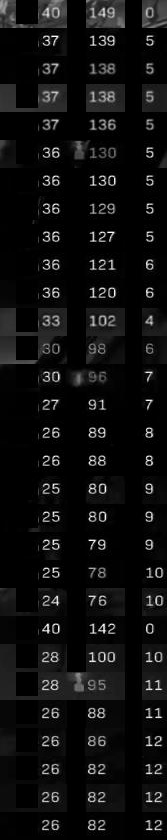

In [2]:
from PIL import Image

df = pd.read_csv(f'{data_dir}sample_records.csv').dropna()

image_files = [fn for fn in df.reference_file]

count = len(image_files)
print(f'count == {count}')

image1_size = Image.open(f'{image_files[0]}').size

new_image = Image.new('RGB', (image1_size[0], image1_size[1]*len(df)), (250,250,250))

for i in range(count):
    fn = image_files[i]
    image = Image.open(fn)
    new_image.paste(image, (image1_size[0]*0, image1_size[1]*i))

new_image